In [1]:
import warnings
warnings.filterwarnings('ignore')

# 로지스틱 회귀로 와인 분류하기


In [2]:
import pandas as pd
wine = pd.read_csv("../Data/wine.csv")
wine.head()
# class = 0: Red wine, 1: White wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
# class의 종류
wine['class'].unique()

array([0., 1.])

> 0 : Red wine , 1: White wine

In [5]:
# 기본 통계량
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
# Dimesion
wine.shape

(6497, 4)

---
# Feature와 Target으로 Data 분리

In [7]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

### Train과 Test 분리
 

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(
    data,target,test_size=0.2,random_state=42
)

In [9]:
# Train과 Test의 크기 확인
print("Train :",train_input.shape)
print("Test :",test_input.shape)

Train : (5197, 3)
Test : (1300, 3)


### 정규화하기(로지스틱 회귀이므로)

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 로지스틱 회귀 모델 실행


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_target)

print("train score", lr.score(train_scaled,train_target))
print("test score", lr.score(test_scaled,test_target))

train score 0.7808350971714451
test score 0.7776923076923077


In [12]:
# 가중치와 편차
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


class = 0.51270274 * alcohol + 1.6733911 * sugar + (-0.68767781) *pH + 1.81777902


---
### 결정트리 (Decision Tree) 
:크냐 작냐를 구분하므로 마이너스가 나올수 없음

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)

print("train score", dt.score(train_scaled,train_target))
print("test score", dt.score(test_scaled,test_target))

# 결정트리는 기본적으로 과대적합을 많이 일으킴 => 앙상블을 이용해 해결

train score 0.996921300750433
test score 0.8592307692307692


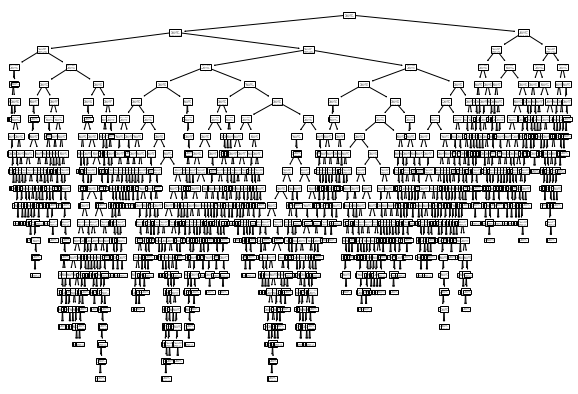

In [14]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

> 맨 위의 단계를 root node라고 하고 마지막 단계는 leaf node라고 합니다.     
> 시간이 많이 걸리고 단계가 너무 복잡하다.     

위의 문제로 인해 이를 단순화 해야함 => 규제를 줘야함

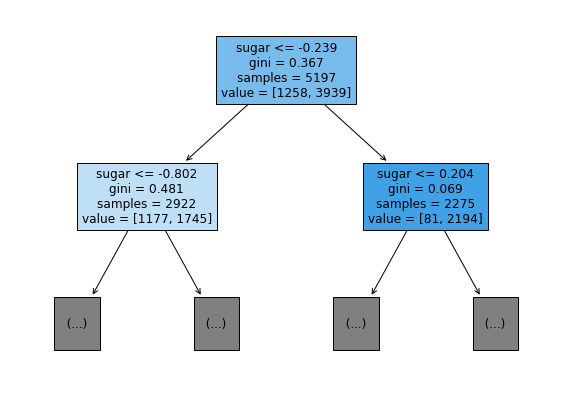

In [15]:
# decision tree의 단계(depth)를 단순하게 하자
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
 # filled :색깔 주는거 (1로 근접할 경우 blue, 0으로 근접할 경우 orange)
plt.show()

> sugar(데이터 간 차이가 크므로 해당 feature로 결정) 기준으로 Yes면 왼쪽 No면 오른쪽   
> The samples of 'YES' = 2922 , The samples of 'NO' =2275

### 지니 불순도(Gini impurity)
불순도가 0일때까지 계속 나눔      
1 - ((1258/5197)^2 + (3939/5197)^2)  root node 지니 불순도 식   
  
지니 불순도가 0이 나올때를 순수노드라고 한다.          
리프노드가 순수노드인 것 좋으나 이때문에 과대적합이 발생한다.       
따라서 적절한 max_depth를 찾는 것이 중요하다.      

# 가지치기(Tree Pruning)
- max_depth의 parameter값을 조절    
- decision tree에서 과대적합을 막는다.   
- L1규제, L2규제 등을 사용할 수 없다.   

In [16]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)

print("train score", dt.score(train_scaled,train_target))
print("test score", dt.score(test_scaled,test_target))

# 과대적합 사라짐 

train score 0.8454877814123533
test score 0.8415384615384616


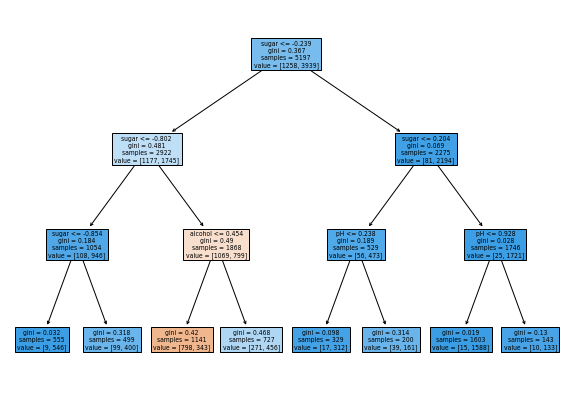

In [17]:
# 시각화
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

주황색 => Red wine     
파란색 => White wine     
value = [red wine, white wine] value 큰 걸로 판단   

In [18]:
# 특성 중요도
dt.feature_importances_

# sugar feauture에 의해 거의 결정된다. 

array([0.12345626, 0.86862934, 0.0079144 ])

---
### 최적화 시키기 

In [19]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)
# 노들를 분할하는 기준인 지니의 최소 불순도가 0
dt.fit(train_scaled,train_target)

print("train score", dt.score(train_scaled,train_target))
print("test score", dt.score(test_scaled,test_target))

train score 0.8874350586877044
test score 0.8615384615384616


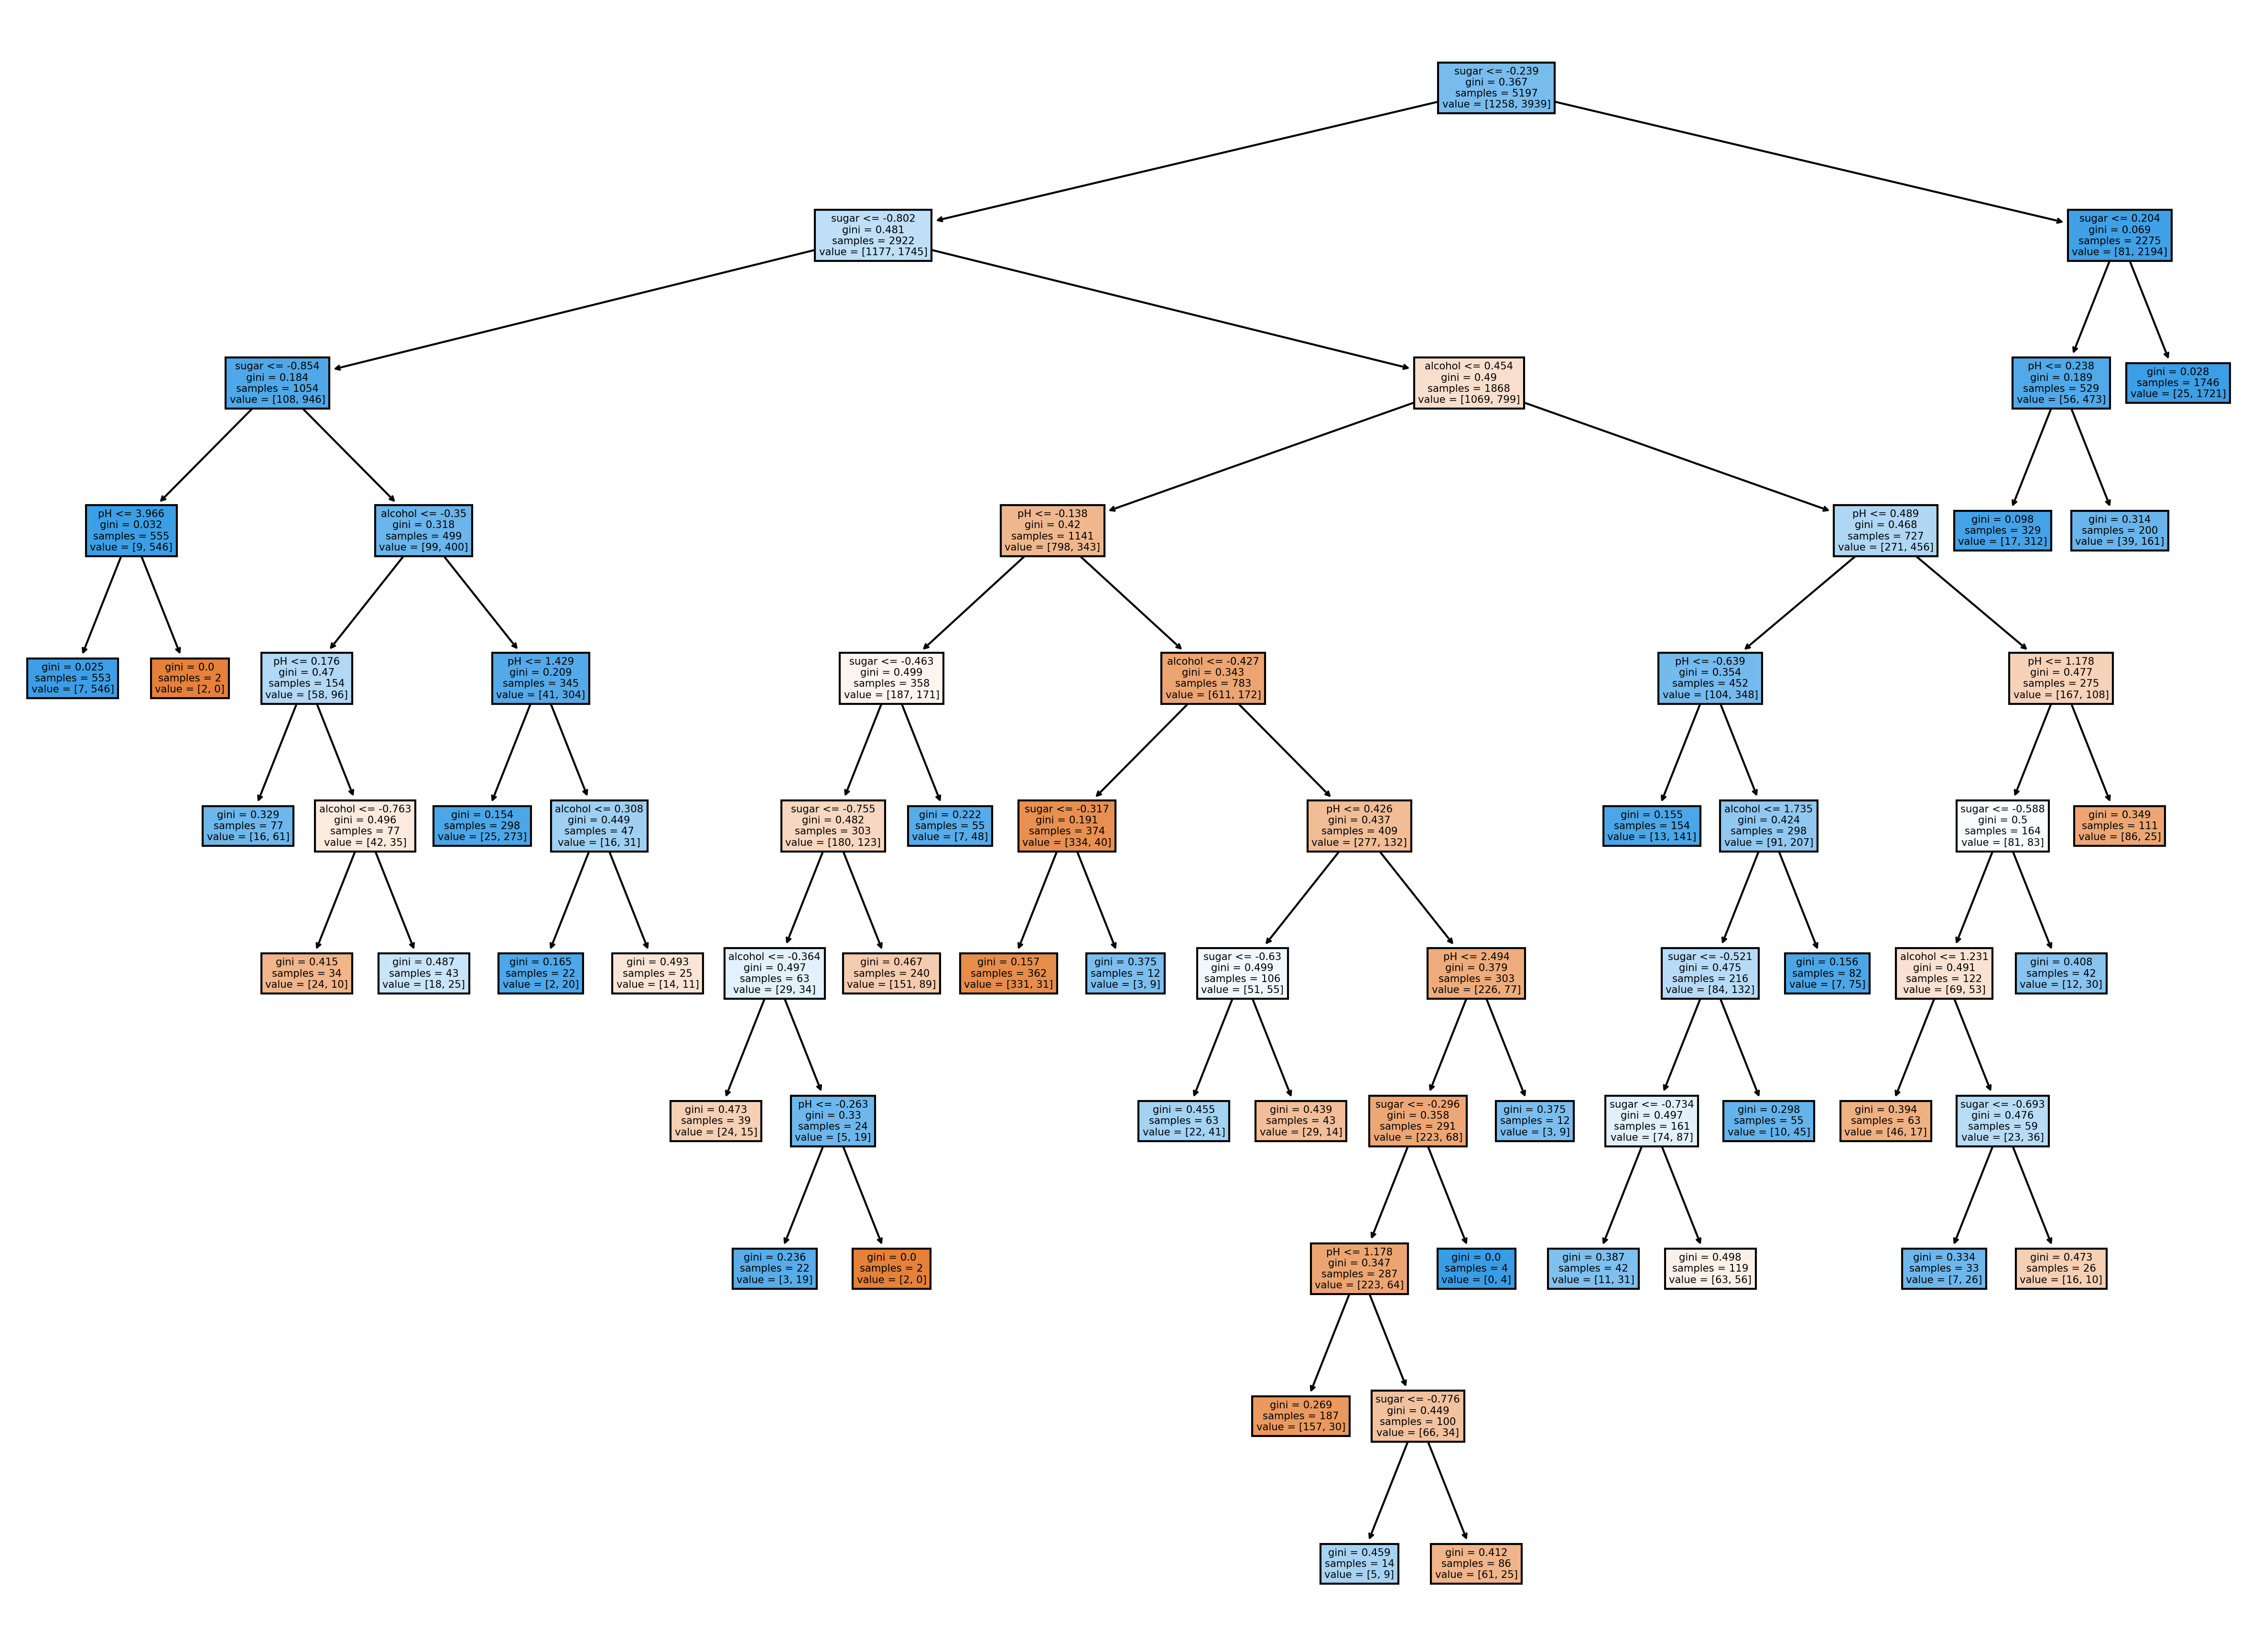

In [23]:
# 시각화 화기
plt.figure(figsize=(20,15),dpi=300) # dpi : dot per inch
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.savefig("../Data/wine.jpg")
plt.show()